By Rahul kumar 💻 ✈

github - https://github.com/Rahul5914

youtube - https://youtube.com/@biharwaleenginner?si=n-b4mPbcUZ35wt7P

linkedin - https://www.linkedin.com/in/rahul-kumar-3829b322a/

instagram: - @therahul5914

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_355.jpg', 'with_mask_1822.jpg', 'with_mask_2495.jpg', 'with_mask_1210.jpg', 'with_mask_857.jpg']
['with_mask_2418.jpg', 'with_mask_2945.jpg', 'with_mask_3461.jpg', 'with_mask_3309.jpg', 'with_mask_1331.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_394.jpg', 'without_mask_3660.jpg', 'without_mask_879.jpg', 'without_mask_526.jpg', 'without_mask_2708.jpg']
['without_mask_172.jpg', 'without_mask_1886.jpg', 'without_mask_164.jpg', 'without_mask_3381.jpg', 'without_mask_1312.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

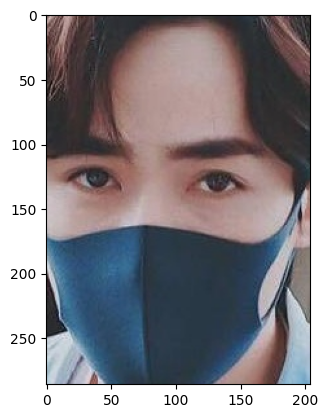

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1544.jpg')
imgplot = plt.imshow(img)
plt.show()

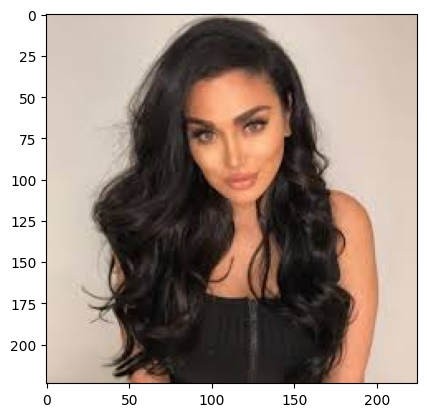

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2920.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

 1. Resize the Images

 2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[222, 181, 117],
        [221, 180, 116],
        [214, 172, 113],
        ...,
        [104,  60,  24],
        [105,  58,  25],
        [104,  58,  24]],

       [[225, 184, 120],
        [222, 180, 118],
        [213, 171, 113],
        ...,
        [105,  59,  24],
        [102,  56,  23],
        [101,  54,  20]],

       [[226, 181, 121],
        [223, 177, 118],
        [210, 166, 110],
        ...,
        [111,  64,  28],
        [109,  62,  25],
        [108,  60,  24]],

       ...,

       [[ 62,  38,  10],
        [ 61,  37,  10],
        [ 61,  36,  12],
        ...,
        [ 46,  23,   9],
        [ 45,  22,   8],
        [ 45,  22,   8]],

       [[ 56,  31,   3],
        [ 55,  30,   3],
        [ 54,  29,   4],
        ...,
        [ 44,  21,   7],
        [ 44,  21,   7],
        [ 44,  21,   7]],

       [[ 54,  33,   6],
        [ 54,  31,   5],
        [ 54,  29,   4],
        ...,
        [ 43,  20,   6],
        [ 43,  20,   6],
        [ 44,  21,   7]]], dtype=uint8)
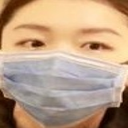

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[51, 43, 54],
        [59, 51, 62],
        [73, 65, 76],
        ...,
        [60, 46, 51],
        [74, 57, 60],
        [79, 63, 66]],

       [[58, 50, 62],
        [75, 67, 77],
        [95, 88, 97],
        ...,
        [51, 38, 42],
        [61, 45, 49],
        [65, 49, 52]],

       [[75, 69, 78],
        [80, 74, 81],
        [85, 79, 86],
        ...,
        [33, 23, 28],
        [46, 34, 38],
        [54, 40, 44]],

       ...,

       [[45, 43, 50],
        [41, 39, 45],
        [36, 33, 40],
        ...,
        [12, 16, 25],
        [12, 15, 24],
        [12, 15, 24]],

       [[46, 45, 51],
        [41, 40, 46],
        [34, 33, 39],
        ...,
        [13, 16, 25],
        [13, 16, 25],
        [13, 16, 25]],

       [[47, 46, 52],
        [41, 40, 46],
        [34, 33, 39],
        ...,
        [14, 17, 26],
        [13, 16, 25],
        [13, 16, 25]]], dtype=uint8)
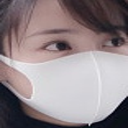

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.2       , 0.16862745, 0.21176471],
        [0.23137255, 0.2       , 0.24313725],
        [0.28627451, 0.25490196, 0.29803922],
        ...,
        [0.23529412, 0.18039216, 0.2       ],
        [0.29019608, 0.22352941, 0.23529412],
        [0.30980392, 0.24705882, 0.25882353]],

       [[0.22745098, 0.19607843, 0.24313725],
        [0.29411765, 0.2627451 , 0.30196078],
        [0.37254902, 0.34509804, 0.38039216],
        ...,
        [0.2       , 0.14901961, 0.16470588],
        [0.23921569, 0.17647059, 0.19215686],
        [0.25490196, 0.19215686, 0.20392157]],

       [[0.29411765, 0.27058824, 0.30588235],
        [0.31372549, 0.29019608, 0.31764706],
        [0.33333333, 0.30980392, 0.3372549 ],
        ...,
        [0.12941176, 0.09019608, 0.10980392],
        [0.18039216, 0.13333333, 0.14901961],
        [0.21176471, 0.15686275, 0.17254902]],

       ...,

       [[0.17647059, 0.16862745, 0.19607843],
        [0.16078431, 0.15294118, 0.17647059],
        [0.14117647, 0

Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 133s 771ms/step - acc: 0.6643 - loss: 0.7014 - val_acc: 0.8694 - val_loss: 0.2938
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 130s 763ms/step - acc: 0.8837 - loss: 0.3018 - val_acc: 0.8926 - val_loss: 0.2558
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 757ms/step - acc: 0.9168 - loss: 0.2302 - val_acc: 0.9025 - val_loss: 0.2180
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 131s 770ms/step - acc: 0.9254 - loss: 0.1970 - val_acc: 0.9140 - val_loss: 0.1983
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 128s 755ms/step - acc: 0.9476 - loss: 0.1429 - val_acc: 0.9157 - val_loss: 0.1980


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 275ms/step - acc: 0.9170 - loss: 0.2161
Test Accuracy = 0.9258769154548645


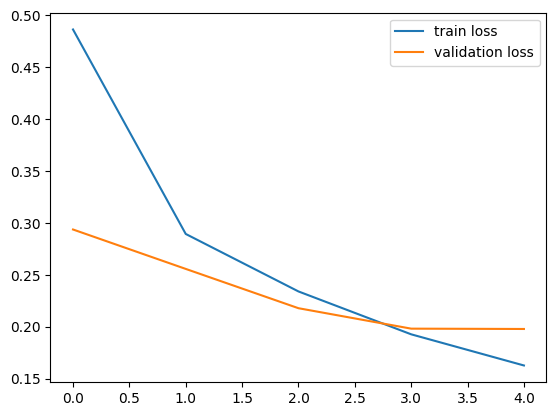

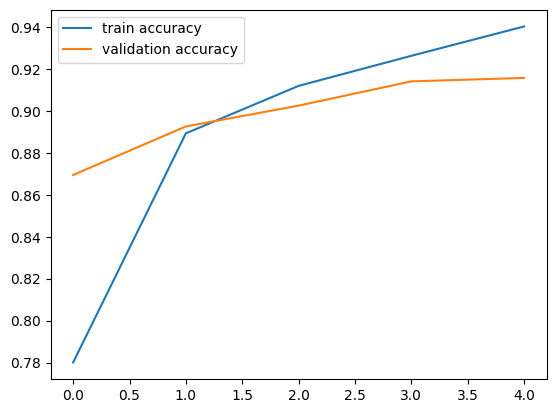

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/srk mask.jpeg


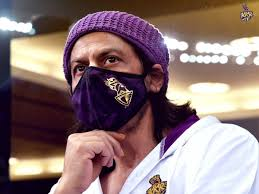

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
[[0.08805449 0.7899924 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/srki.jpeg


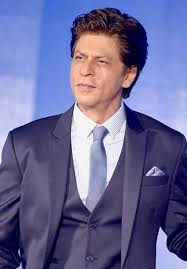

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.7303988 0.2955992]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')